## Importing Necessary Library



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## Data Loading from two CPD files 4.8.0 and 4.7.1


In [2]:
df1=pd.read_csv("cvelist.csv")
df2 = pd.read_csv("cvelist_4.7.1.csv")

## Adding new column for CPD version 

In [3]:
df1['cpdVersion'] = '4.8.0'
df2['cpdVersion'] = '4.7.1'

## Concatetnate two CSVs

In [4]:
df = pd.concat([df1, df2], ignore_index=True)

In [5]:
df.shape

(1860, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1860 entries, 0 to 1859
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Image            1860 non-null   object 
 1   Tag              1860 non-null   object 
 2   Digest           1860 non-null   object 
 3   CVE              1860 non-null   object 
 4   Score            1860 non-null   float64
 5   Pub_Date         1860 non-null   object 
 6   Severity         1860 non-null   object 
 7   Exploitability   0 non-null      float64
 8   Exploit Type     0 non-null      float64
 9   Package          1860 non-null   object 
 10  Package Version  1860 non-null   object 
 11  Fixed Version    1860 non-null   object 
 12  Package Path     1799 non-null   object 
 13  Description      1860 non-null   object 
 14  cpdVersion       1860 non-null   object 
dtypes: float64(3), object(12)
memory usage: 218.1+ KB


## Change Pub_Date type from object to datetime format

In [7]:
# Convert 'Pub_Date' column to datetime format
df['Pub_Date'] = pd.to_datetime(df['Pub_Date'], errors='coerce')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1860 entries, 0 to 1859
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Image            1860 non-null   object        
 1   Tag              1860 non-null   object        
 2   Digest           1860 non-null   object        
 3   CVE              1860 non-null   object        
 4   Score            1860 non-null   float64       
 5   Pub_Date         1860 non-null   datetime64[ns]
 6   Severity         1860 non-null   object        
 7   Exploitability   0 non-null      float64       
 8   Exploit Type     0 non-null      float64       
 9   Package          1860 non-null   object        
 10  Package Version  1860 non-null   object        
 11  Fixed Version    1860 non-null   object        
 12  Package Path     1799 non-null   object        
 13  Description      1860 non-null   object        
 14  cpdVersion       1860 non-null   object 

## Missing value check in %

In [9]:
100*df.isnull().mean()

Image                0.00000
Tag                  0.00000
Digest               0.00000
CVE                  0.00000
Score                0.00000
Pub_Date             0.00000
Severity             0.00000
Exploitability     100.00000
Exploit Type       100.00000
Package              0.00000
Package Version      0.00000
Fixed Version        0.00000
Package Path         3.27957
Description          0.00000
cpdVersion           0.00000
dtype: float64

## two column will have to remove from our analysis

In [10]:
# axis=1 means column and axis=0 means rows
df=df.drop(["Exploitability", "Exploit Type"],axis=1)

In [11]:
100*df.isnull().mean()

Image              0.00000
Tag                0.00000
Digest             0.00000
CVE                0.00000
Score              0.00000
Pub_Date           0.00000
Severity           0.00000
Package            0.00000
Package Version    0.00000
Fixed Version      0.00000
Package Path       3.27957
Description        0.00000
cpdVersion         0.00000
dtype: float64

In [12]:
df.head(2)

,Image,Tag,Digest,CVE,Score,Pub_Date,Severity,Package,Package Version,Fixed Version,Package Path,Description,cpdVersion
0,ipm-cpd-admin,12.0.9,sha256:035bb0ca8fe53ad6743ca761948a08d3c6caa39...,CVE-2021-35942,9.1,2021-07-22,critical,glibc,2.28,2.32,/usr/sbin/ldconfig,The wordexp function in the GNU C Library (aka...,4.8.0
1,ipm-cpd-admin,12.0.9,sha256:035bb0ca8fe53ad6743ca761948a08d3c6caa39...,CVE-2021-3999,7.8,2022-08-24,high,glibc,2.28,2.31,/usr/sbin/ldconfig,A flaw was found in glibc. An off-by-one buffe...,4.8.0


In [13]:
100*df.isnull().mean()

Image              0.00000
Tag                0.00000
Digest             0.00000
CVE                0.00000
Score              0.00000
Pub_Date           0.00000
Severity           0.00000
Package            0.00000
Package Version    0.00000
Fixed Version      0.00000
Package Path       3.27957
Description        0.00000
cpdVersion         0.00000
dtype: float64

## print missing value of 'package path' column

In [14]:
df[df['Package Path'].isnull()]

,Image,Tag,Digest,CVE,Score,Pub_Date,Severity,Package,Package Version,Fixed Version,Package Path,Description,cpdVersion
1399,ipm-cpd-mq,9.3.0.4-r1,sha256:e45789bb1722e549b1947bcf68589b2d19aba12...,RHSA-2023:1140,6.5,2023-03-07,moderate,curl,7.61.1-22.el8_6.4,0:7.61.1-25.el8_7.3,NaN,An update for curl is now available for Red Ha...,4.7.1
1400,ipm-cpd-mq,9.3.0.4-r1,sha256:e45789bb1722e549b1947bcf68589b2d19aba12...,RHSA-2023:3106,5.9,2023-05-16,moderate,curl,7.61.1-22.el8_6.4,0:7.61.1-30.el8_8.2,NaN,An update for curl is now available for Red Ha...,4.7.1
1401,ipm-cpd-mq,9.3.0.4-r1,sha256:e45789bb1722e549b1947bcf68589b2d19aba12...,RHSA-2023:2963,5.9,2023-05-16,low,curl,7.61.1-22.el8_6.4,0:7.61.1-30.el8,NaN,An update for curl is now available for Red Ha...,4.7.1
1402,ipm-cpd-mq,9.3.0.4-r1,sha256:e45789bb1722e549b1947bcf68589b2d19aba12...,RHSA-2022:6878,8.1,2022-10-11,important,expat,2.2.5-8.el8_6.2,0:2.2.5-8.el8_6.3,NaN,An update for expat is now available for Red H...,4.7.1
1403,ipm-cpd-mq,9.3.0.4-r1,sha256:e45789bb1722e549b1947bcf68589b2d19aba12...,RHSA-2023:0103,7.5,2023-01-12,moderate,expat,2.2.5-8.el8_6.2,0:2.2.5-10.el8_7.1,NaN,An update for expat is now available for Red H...,4.7.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1471,ipm-cpd-mq,9.3.0.4-r1,sha256:e45789bb1722e549b1947bcf68589b2d19aba12...,CVE-2022-35252,3.1,2022-09-23,low,curl,7.61.1-22.el8_6.4,fixed in 7.61.1-30.el8,NaN,When curl is used to retrieve and parse cookie...,4.7.1
1472,ipm-cpd-mq,9.3.0.4-r1,sha256:e45789bb1722e549b1947bcf68589b2d19aba12...,CVE-2022-37434,7.0,2022-08-05,moderate,zlib,1.2.11-18.el8_5,fixed in 1.2.11-19.el8_6,NaN,zlib through 1.2.12 has a heap-based buffer ov...,4.7.1
1473,ipm-cpd-mq,9.3.0.4-r1,sha256:e45789bb1722e549b1947bcf68589b2d19aba12...,CVE-2022-40303,7.5,2022-11-22,moderate,libxml2,2.9.7-13.el8_6.1,fixed in 2.9.7-15.el8_7.1,NaN,An issue was discovered in libxml2 before 2.10...,4.7.1
1474,ipm-cpd-mq,9.3.0.4-r1,sha256:e45789bb1722e549b1947bcf68589b2d19aba12...,CVE-2023-2283,4.8,2023-05-26,moderate,libssh,0.9.6-3.el8,fixed in 0.9.6-10.el8_8,NaN,"A vulnerability was found in libssh, where the...",4.7.1


## fill in missing value in package path column

In [15]:
fill_value = 'NoData'

In [16]:
df['Package Path'].fillna(fill_value, inplace=True)

In [17]:
100*df.isnull().mean()

Image              0.0
Tag                0.0
Digest             0.0
CVE                0.0
Score              0.0
Pub_Date           0.0
Severity           0.0
Package            0.0
Package Version    0.0
Fixed Version      0.0
Package Path       0.0
Description        0.0
cpdVersion         0.0
dtype: float64

In [18]:
#find out unique value of the columns

In [19]:
df.nunique()

Image               15
Tag                  6
Digest              28
CVE                203
Score               39
Pub_Date           102
Severity             6
Package             53
Package Version     61
Fixed Version      133
Package Path        49
Description        218
cpdVersion           2
dtype: int64

In [20]:
df['Score']

0       9.1
1       7.8
2       7.5
3       7.0
4       7.0
       ... 
1855    9.8
1856    7.3
1857    9.8
1858    7.5
1859    7.5
Name: Score, Length: 1860, dtype: float64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1860 entries, 0 to 1859
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Image            1860 non-null   object        
 1   Tag              1860 non-null   object        
 2   Digest           1860 non-null   object        
 3   CVE              1860 non-null   object        
 4   Score            1860 non-null   float64       
 5   Pub_Date         1860 non-null   datetime64[ns]
 6   Severity         1860 non-null   object        
 7   Package          1860 non-null   object        
 8   Package Version  1860 non-null   object        
 9   Fixed Version    1860 non-null   object        
 10  Package Path     1860 non-null   object        
 11  Description      1860 non-null   object        
 12  cpdVersion       1860 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(11)
memory usage: 189.0+ KB


## convert float to Integer and round the value

In [22]:
df['Score'] = df['Score'].round().astype(int)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1860 entries, 0 to 1859
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Image            1860 non-null   object        
 1   Tag              1860 non-null   object        
 2   Digest           1860 non-null   object        
 3   CVE              1860 non-null   object        
 4   Score            1860 non-null   int32         
 5   Pub_Date         1860 non-null   datetime64[ns]
 6   Severity         1860 non-null   object        
 7   Package          1860 non-null   object        
 8   Package Version  1860 non-null   object        
 9   Fixed Version    1860 non-null   object        
 10  Package Path     1860 non-null   object        
 11  Description      1860 non-null   object        
 12  cpdVersion       1860 non-null   object        
dtypes: datetime64[ns](1), int32(1), object(11)
memory usage: 181.8+ KB


In [24]:
df['Score']

0        9
1        8
2        8
3        7
4        7
        ..
1855    10
1856     7
1857    10
1858     8
1859     8
Name: Score, Length: 1860, dtype: int32

In [25]:
cat_cols=["Image","Tag","CVE","Severity","Package Version","Package","cpdVersion","Score"]
num_cols=["Score"]
extra_cols=["Description","Package Path","Digest","Fixed Version","Pub_Date"]


## drop unwanted columns

In [26]:
df=df.drop(extra_cols,axis=1)

In [27]:
df.shape

(1860, 8)

In [28]:
df.columns

Index(['Image', 'Tag', 'CVE', 'Score', 'Severity', 'Package',
       'Package Version', 'cpdVersion'],
      dtype='object')

## Univariate Analysis (one variable analysis)

In [29]:
df

,Image,Tag,CVE,Score,Severity,Package,Package Version,cpdVersion
0,ipm-cpd-admin,12.0.9,CVE-2021-35942,9,critical,glibc,2.28,4.8.0
1,ipm-cpd-admin,12.0.9,CVE-2021-3999,8,high,glibc,2.28,4.8.0
2,ipm-cpd-admin,12.0.9,CVE-2023-5156,8,high,glibc,2.28,4.8.0
3,ipm-cpd-admin,12.0.9,CVE-2020-1751,7,high,glibc,2.28,4.8.0
4,ipm-cpd-admin,12.0.9,CVE-2020-1752,7,high,glibc,2.28,4.8.0
...,...,...,...,...,...,...,...,...
1855,ibm-cpd-productmaster-operator-catalog,4.1.0-amd64-29,CVE-2023-24540,10,critical,go,1.19.7,4.7.1
1856,ibm-cpd-productmaster-operator-catalog,4.1.0-amd64-29,CVE-2023-24539,7,high,go,1.19.7,4.7.1
1857,ibm-cpd-productmaster-operator-catalog,4.1.0-amd64-29,CVE-2023-24538,10,critical,go,1.19.7,4.7.1
1858,ibm-cpd-productmaster-operator-catalog,4.1.0-amd64-29,CVE-2023-24536,8,high,go,1.19.7,4.7.1


<Axes: xlabel='cpdVersion', ylabel='Count'>

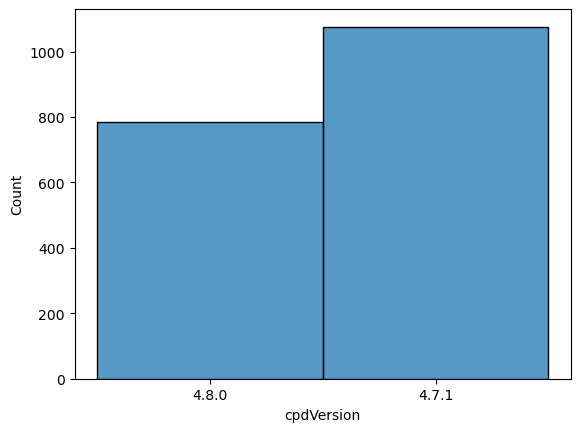

In [30]:
sns.histplot(x=df["cpdVersion"])

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'ipm-cpd-admin'),
  Text(1, 0, 'ipm-cpd-personaui'),
  Text(2, 0, 'ipm-cpd-restapi'),
  Text(3, 0, 'ipm-cpd-sch'),
  Text(4, 0, 'ipm-cpd-wfl'),
  Text(5, 0, 'ipm-cpd-fts-pim'),
  Text(6, 0, 'ipm-cpd-fts-indexer'),
  Text(7, 0, 'ipm-cpd-ml'),
  Text(8, 0, 'ipm-cpd-gds'),
  Text(9, 0, 'ipm-cpd-magento-connector'),
  Text(10, 0, 'ipm-cpd-message-archive-service'),
  Text(11, 0, 'ibm-cpd-productmaster-operator'),
  Text(12, 0, 'ibm-cpd-productmaster-operator-catalog'),
  Text(13, 0, 'ipm-cpd-mq'),
  Text(14, 0, 'ipm-cpd-hazelcast')])

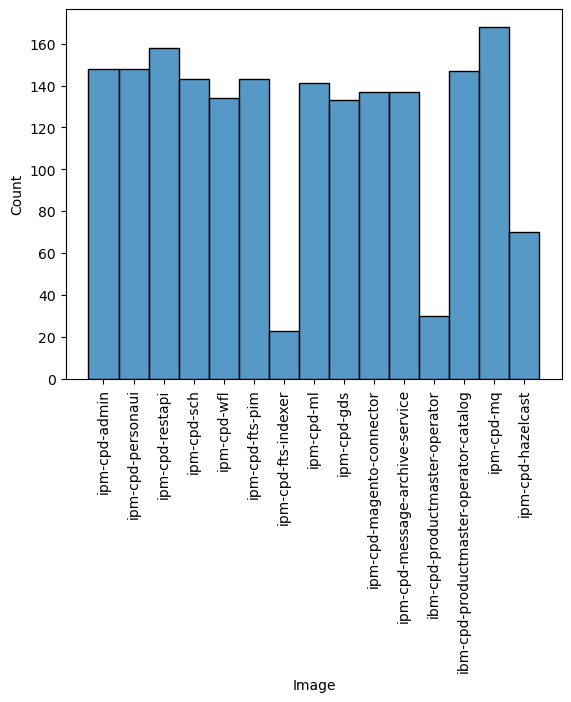

In [31]:
sns.histplot(x=df["Image"])
plt.xticks(rotation=90)

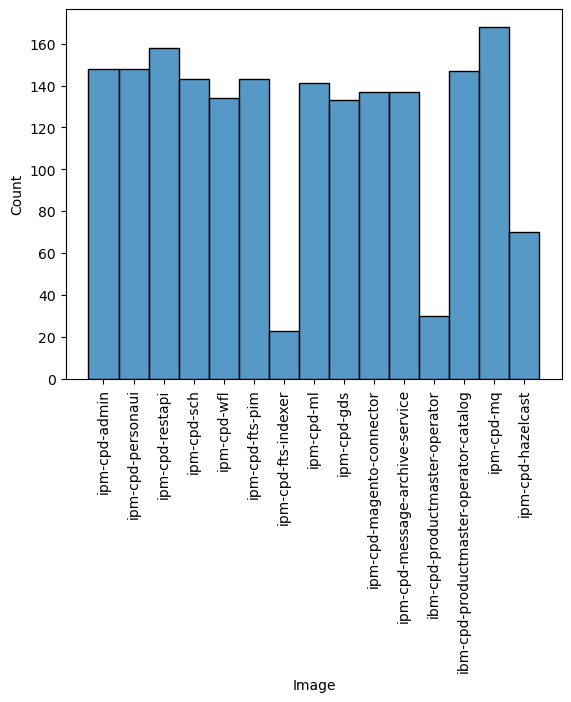

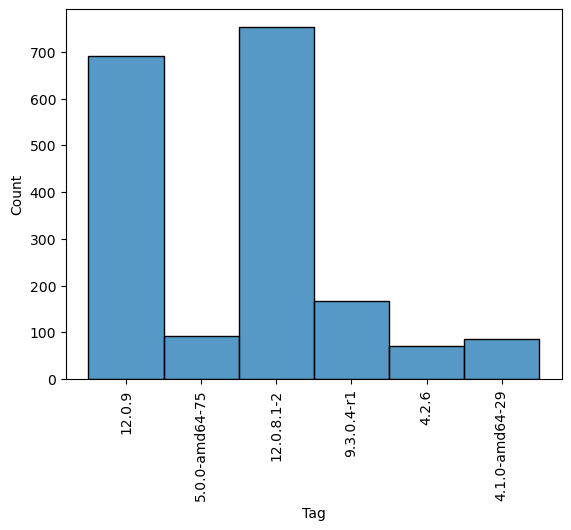

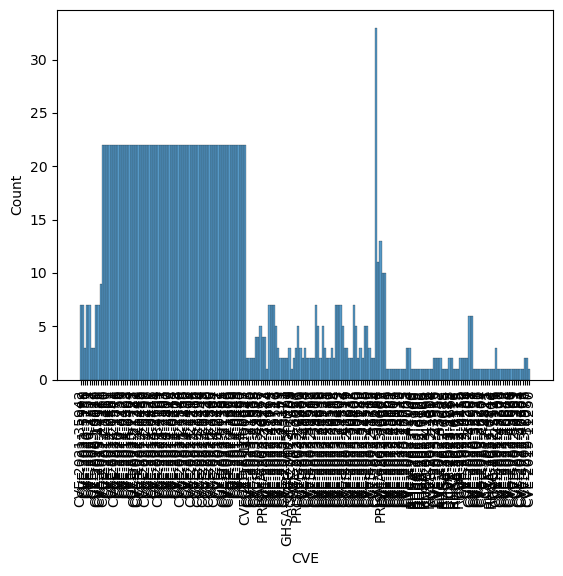

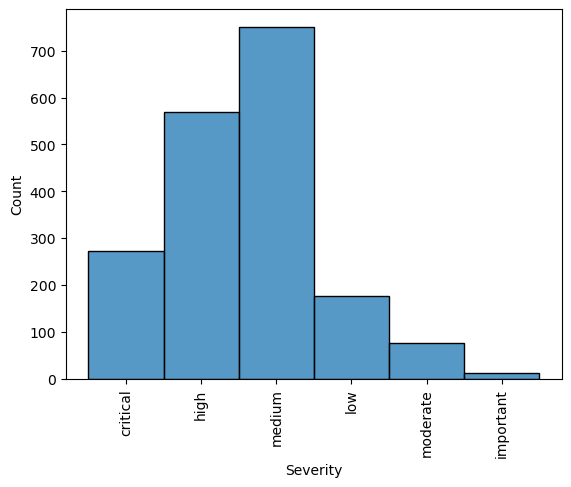

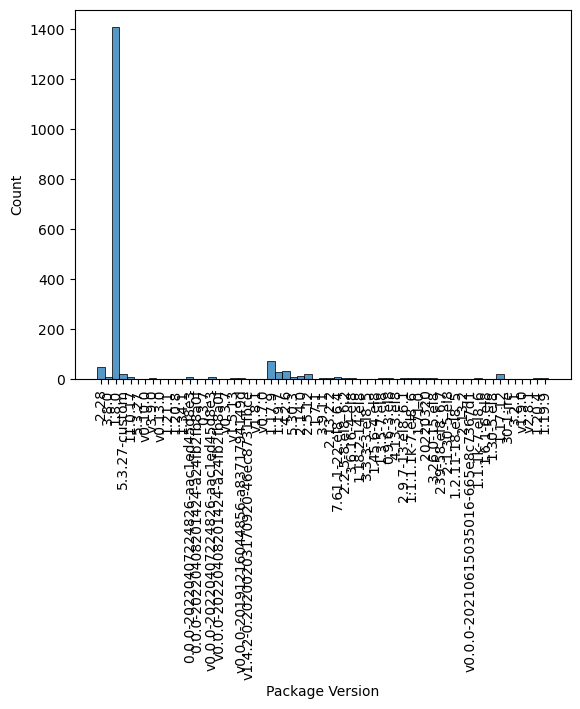

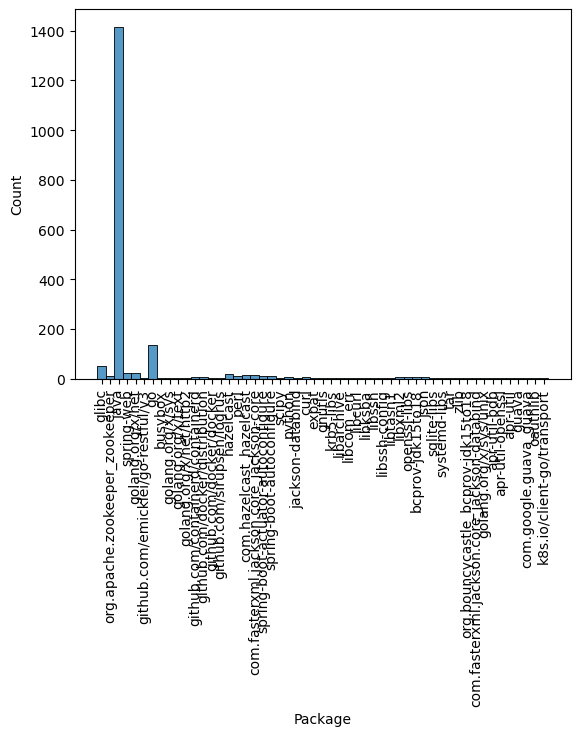

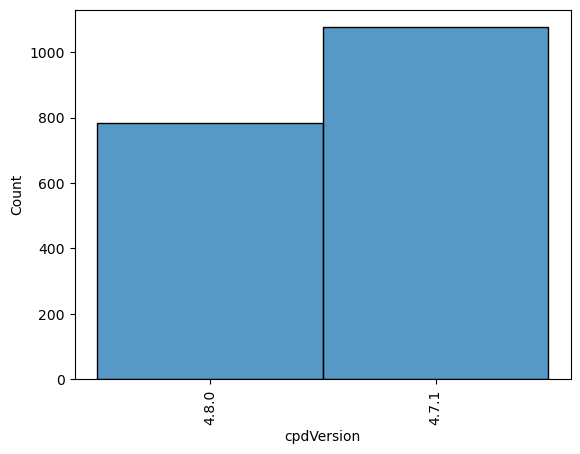

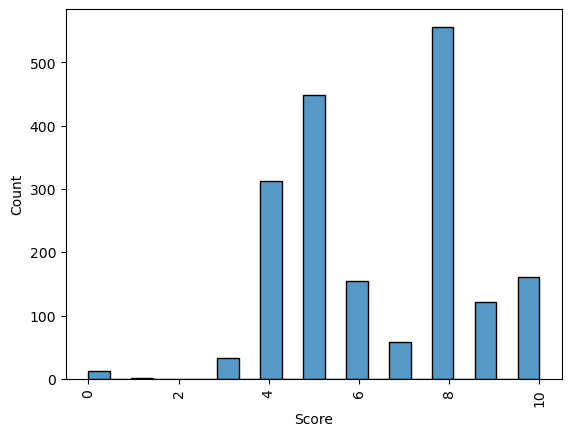

In [32]:
# print all columns one after the other by iterrate
for col in cat_cols:
    sns.histplot(x=df[col])
    plt.xticks(rotation=90)
    plt.show()

## Bivariate Analysis
relation between two columns

#### Numarical Vs Numarical
scatter plot should be used.

In our case we have only one numarical variable(column), hence we are not going to use it.

#### Catagorical Vs Catalogrical

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'ipm-cpd-admin'),
  Text(1, 0, 'ipm-cpd-personaui'),
  Text(2, 0, 'ipm-cpd-restapi'),
  Text(3, 0, 'ipm-cpd-sch'),
  Text(4, 0, 'ipm-cpd-wfl'),
  Text(5, 0, 'ipm-cpd-fts-pim'),
  Text(6, 0, 'ipm-cpd-fts-indexer'),
  Text(7, 0, 'ipm-cpd-ml'),
  Text(8, 0, 'ipm-cpd-gds'),
  Text(9, 0, 'ipm-cpd-magento-connector'),
  Text(10, 0, 'ipm-cpd-message-archive-service'),
  Text(11, 0, 'ibm-cpd-productmaster-operator'),
  Text(12, 0, 'ibm-cpd-productmaster-operator-catalog'),
  Text(13, 0, 'ipm-cpd-mq'),
  Text(14, 0, 'ipm-cpd-hazelcast')])

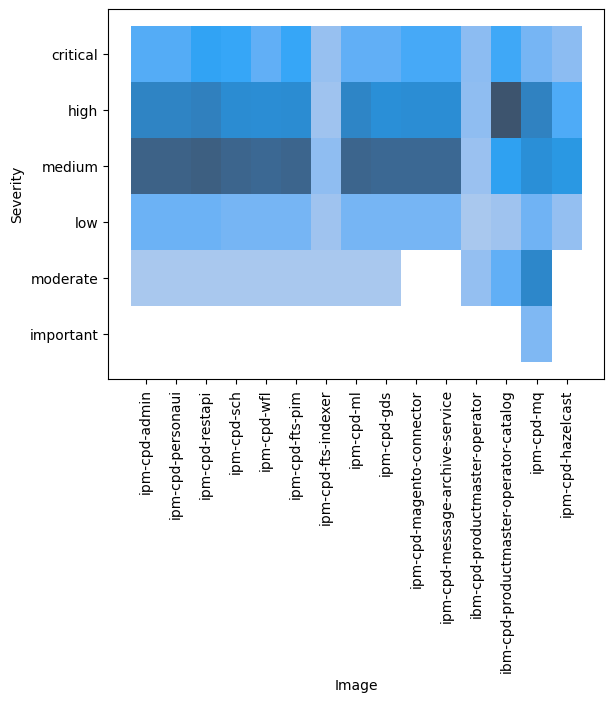

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, 'ibm-cpd-productmaster-operator'),
  Text(1, 0, 'ibm-cpd-productmaster-operator-catalog'),
  Text(2, 0, 'ipm-cpd-admin'),
  Text(3, 0, 'ipm-cpd-fts-indexer'),
  Text(4, 0, 'ipm-cpd-fts-pim'),
  Text(5, 0, 'ipm-cpd-gds'),
  Text(6, 0, 'ipm-cpd-magento-connector'),
  Text(7, 0, 'ipm-cpd-message-archive-service'),
  Text(8, 0, 'ipm-cpd-ml'),
  Text(9, 0, 'ipm-cpd-personaui'),
  Text(10, 0, 'ipm-cpd-restapi'),
  Text(11, 0, 'ipm-cpd-sch'),
  Text(12, 0, 'ipm-cpd-wfl')])

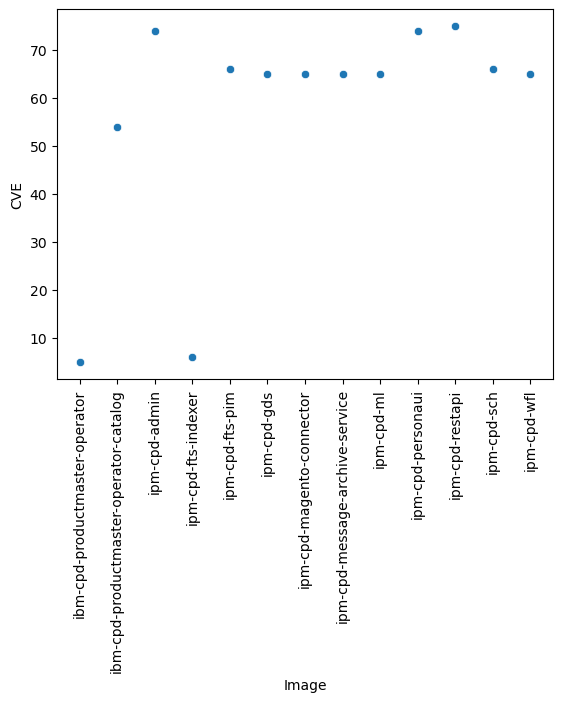

In [33]:
# use CPD 4.8.0 data for this
df_4_8_0 = df[df['cpdVersion'] == '4.8.0']
cve_count_per_image = df_4_8_0.groupby('Image')['CVE'].nunique().reset_index()
sns.scatterplot(x='Image', y='CVE', data=cve_count_per_image)
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, 'ipm-cpd-admin'),
  Text(1, 0, 'ipm-cpd-personaui'),
  Text(2, 0, 'ipm-cpd-restapi'),
  Text(3, 0, 'ipm-cpd-sch'),
  Text(4, 0, 'ipm-cpd-wfl'),
  Text(5, 0, 'ipm-cpd-fts-pim'),
  Text(6, 0, 'ipm-cpd-fts-indexer'),
  Text(7, 0, 'ipm-cpd-ml'),
  Text(8, 0, 'ipm-cpd-gds'),
  Text(9, 0, 'ipm-cpd-magento-connector'),
  Text(10, 0, 'ipm-cpd-message-archive-service'),
  Text(11, 0, 'ibm-cpd-productmaster-operator'),
  Text(12, 0, 'ibm-cpd-productmaster-operator-catalog')])

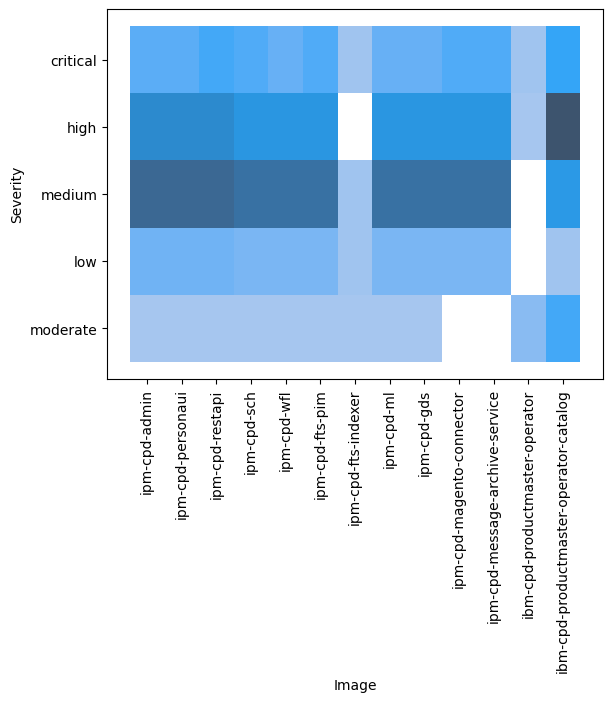

In [44]:
sns.histplot(x=df_4_8_0["Image"],y=df_4_8_0["Severity"])
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'ibm-cpd-productmaster-operator'),
  Text(1, 0, 'ibm-cpd-productmaster-operator-catalog'),
  Text(2, 0, 'ipm-cpd-admin'),
  Text(3, 0, 'ipm-cpd-fts-indexer'),
  Text(4, 0, 'ipm-cpd-fts-pim'),
  Text(5, 0, 'ipm-cpd-gds'),
  Text(6, 0, 'ipm-cpd-hazelcast'),
  Text(7, 0, 'ipm-cpd-magento-connector'),
  Text(8, 0, 'ipm-cpd-message-archive-service'),
  Text(9, 0, 'ipm-cpd-ml'),
  Text(10, 0, 'ipm-cpd-mq'),
  Text(11, 0, 'ipm-cpd-personaui'),
  Text(12, 0, 'ipm-cpd-restapi'),
  Text(13, 0, 'ipm-cpd-sch'),
  Text(14, 0, 'ipm-cpd-wfl')])

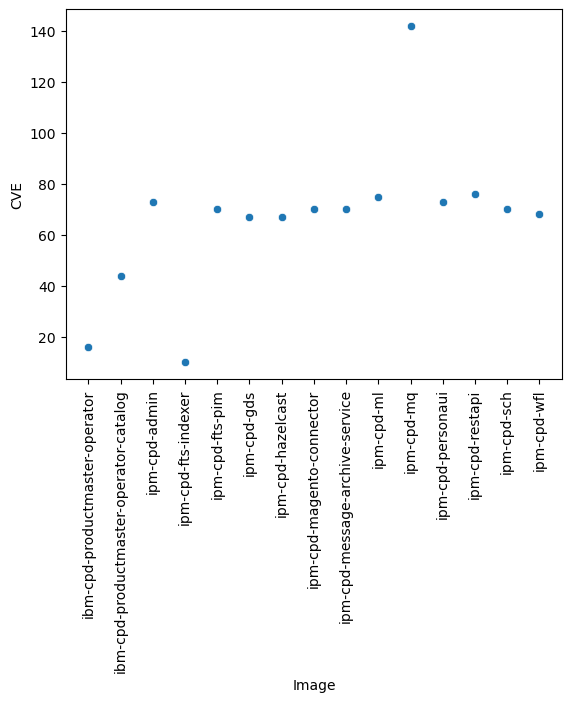

In [34]:
# use CPD 4.7.1 data for this
df_4_7_1 = df[df['cpdVersion'] == '4.7.1']
cve_count_per_image = df_4_7_1.groupby('Image')['CVE'].nunique().reset_index()
sns.scatterplot(x='Image', y='CVE', data=cve_count_per_image)
plt.xticks(rotation=90)

#### Numberical Vs Catagorical

<Axes: xlabel='cpdVersion', ylabel='Score'>

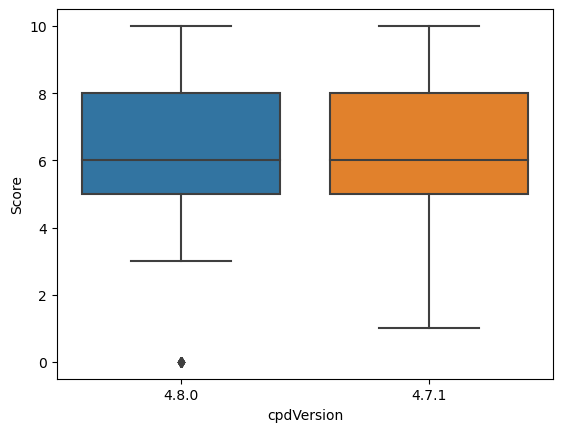

In [35]:
sns.boxplot(x=df["cpdVersion"],y=df["Score"])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'ipm-cpd-admin'),
  Text(1, 0, 'ipm-cpd-personaui'),
  Text(2, 0, 'ipm-cpd-restapi'),
  Text(3, 0, 'ipm-cpd-sch'),
  Text(4, 0, 'ipm-cpd-wfl'),
  Text(5, 0, 'ipm-cpd-fts-pim'),
  Text(6, 0, 'ipm-cpd-fts-indexer'),
  Text(7, 0, 'ipm-cpd-ml'),
  Text(8, 0, 'ipm-cpd-gds'),
  Text(9, 0, 'ipm-cpd-mq'),
  Text(10, 0, 'ipm-cpd-hazelcast'),
  Text(11, 0, 'ipm-cpd-magento-connector'),
  Text(12, 0, 'ipm-cpd-message-archive-service'),
  Text(13, 0, 'ibm-cpd-productmaster-operator'),
  Text(14, 0, 'ibm-cpd-productmaster-operator-catalog')])

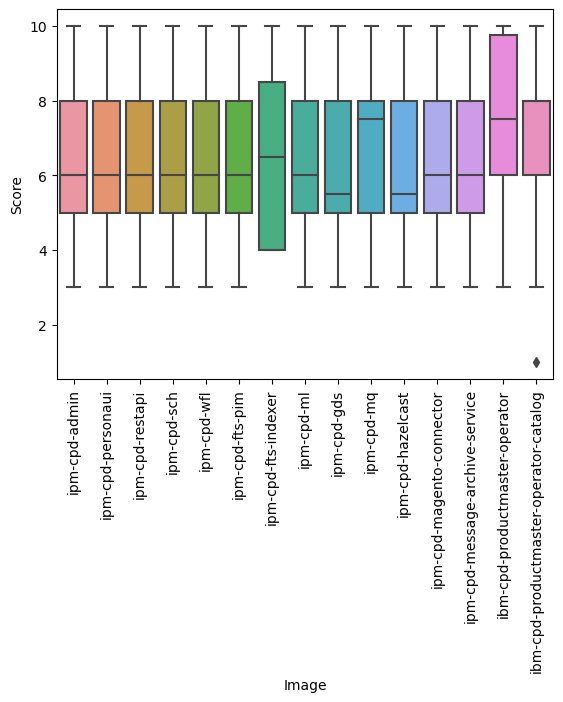

In [36]:
#CPD 4.7.1
sns.boxplot(x=df_4_7_1["Image"],y=df_4_7_1["Score"])
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'ipm-cpd-admin'),
  Text(1, 0, 'ipm-cpd-personaui'),
  Text(2, 0, 'ipm-cpd-restapi'),
  Text(3, 0, 'ipm-cpd-sch'),
  Text(4, 0, 'ipm-cpd-wfl'),
  Text(5, 0, 'ipm-cpd-fts-pim'),
  Text(6, 0, 'ipm-cpd-fts-indexer'),
  Text(7, 0, 'ipm-cpd-ml'),
  Text(8, 0, 'ipm-cpd-gds'),
  Text(9, 0, 'ipm-cpd-magento-connector'),
  Text(10, 0, 'ipm-cpd-message-archive-service'),
  Text(11, 0, 'ibm-cpd-productmaster-operator'),
  Text(12, 0, 'ibm-cpd-productmaster-operator-catalog')])

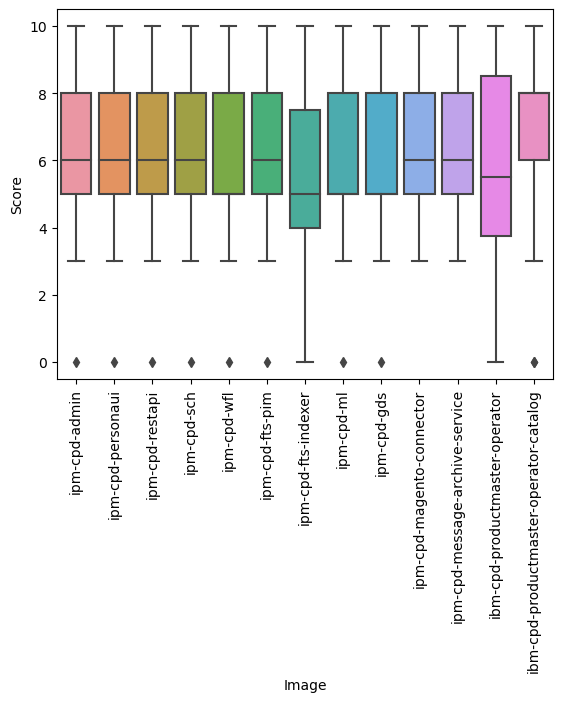

In [37]:
#CPD 4.8.0
sns.boxplot(x=df_4_8_0["Image"],y=df_4_8_0["Score"])
plt.xticks(rotation=90)

In [38]:
df_4_8_0[["Image", "Score"]]

,Image,Score
0,ipm-cpd-admin,9
1,ipm-cpd-admin,8
2,ipm-cpd-admin,8
3,ipm-cpd-admin,7
4,ipm-cpd-admin,7
...,...,...
779,ibm-cpd-productmaster-operator-catalog,6
780,ibm-cpd-productmaster-operator-catalog,8
781,ibm-cpd-productmaster-operator-catalog,6
782,ibm-cpd-productmaster-operator-catalog,8


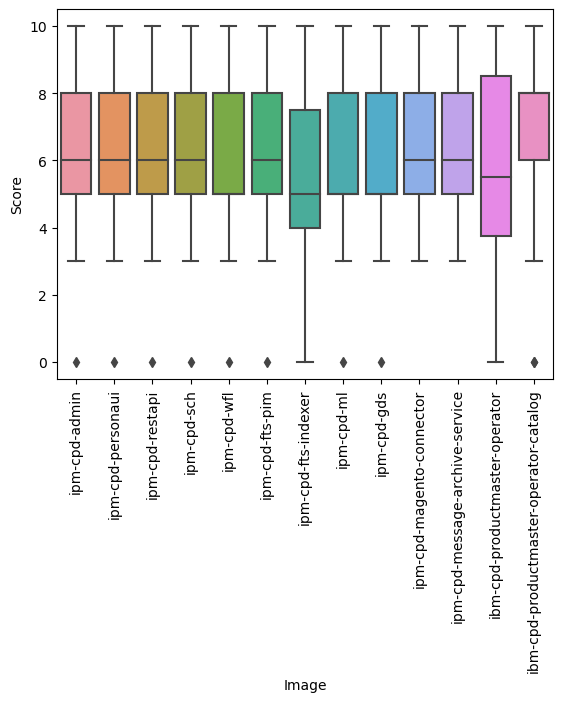

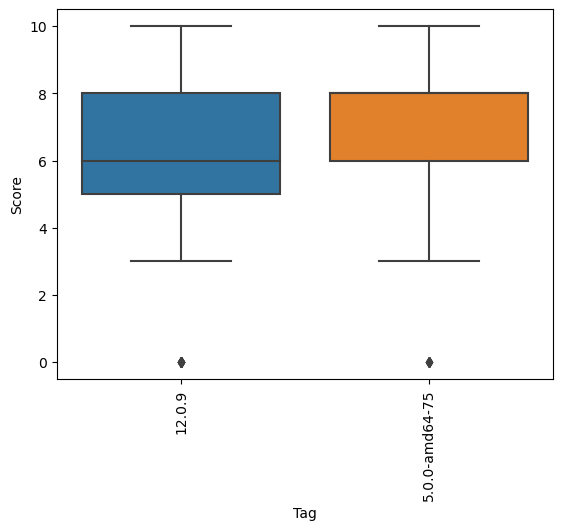

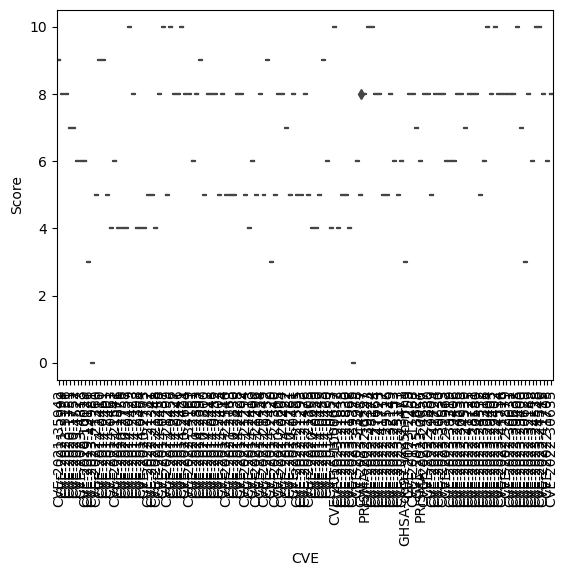

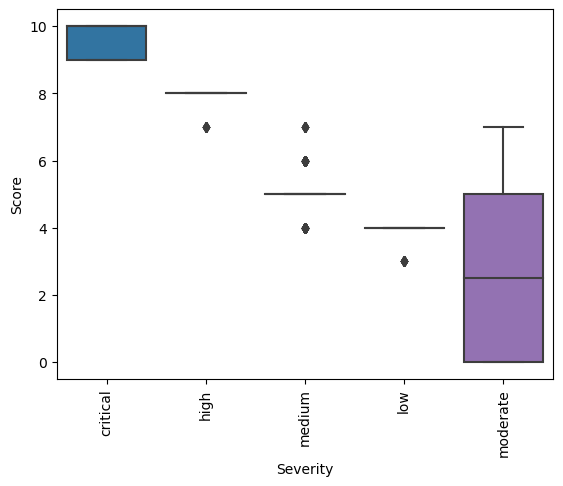

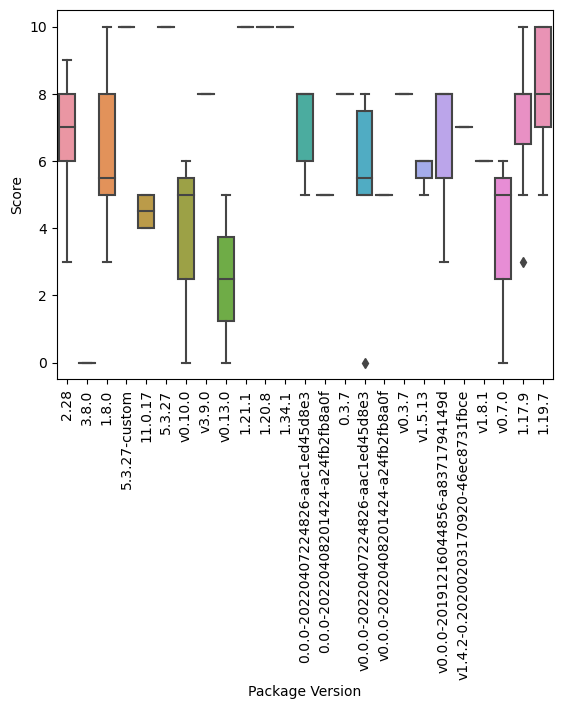

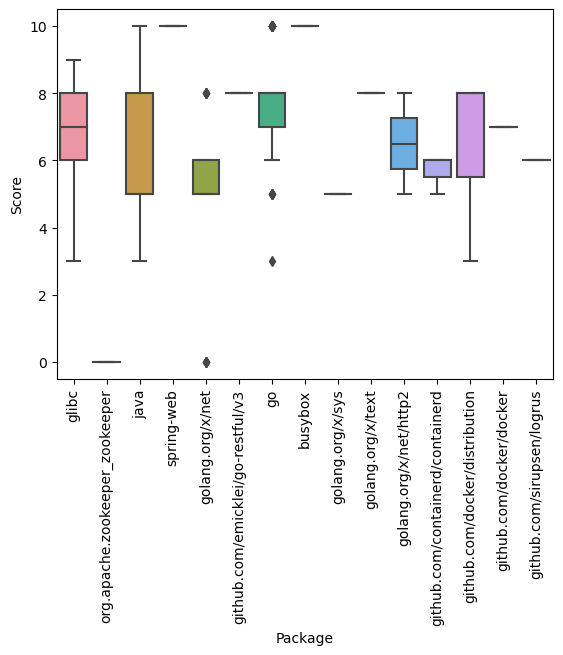

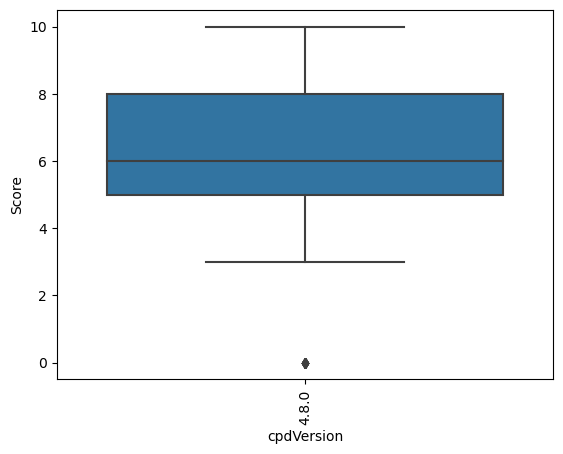

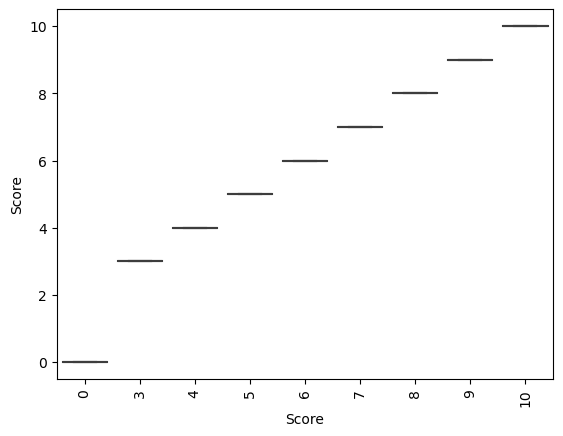

In [39]:
for col1 in cat_cols:
    for col2 in num_cols:
        sns.boxplot(x=df_4_8_0[col1],y=df_4_8_0[col2])
        plt.xticks(rotation=90)
        plt.show()

#### Multivariate Analysis
use pairplot. it is alternative to scatter plot

in this data frame its not helpful because we have only one column with Integer and we hvae only one column score. it requires only numerical columns 

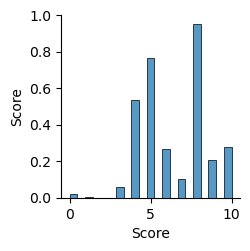

In [47]:
sns.pairplot(df[cat_cols])
plt.show()

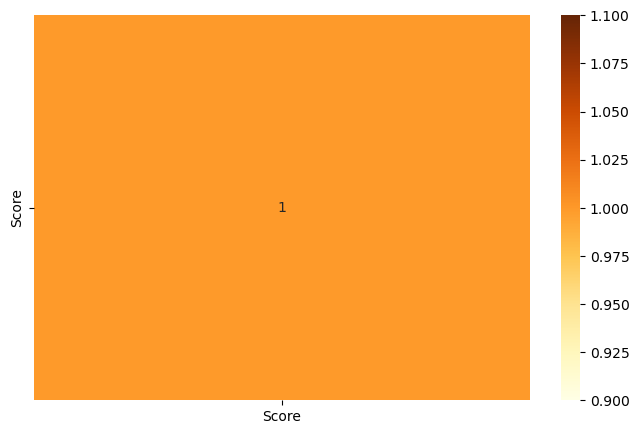

In [53]:
## using heatmap plot
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(),annot=True,cmap="YlOrBr")
plt.show()

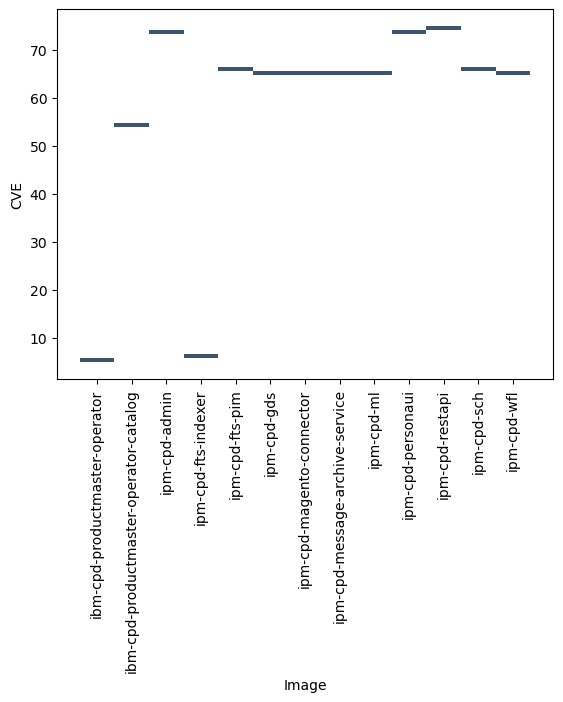

In [65]:
# use CPD 4.8.0 data for this
df_4_8_0 = df[df['cpdVersion'] == '4.8.0']
cve_count_per_image = df_4_8_0.groupby('Image')['CVE'].nunique().reset_index()
sns.histplot(x='Image', y='CVE', data=cve_count_per_image)
plt.xticks(rotation=90)
plt.show()

In [67]:
pip install --upgrade nbconvert

Note: you may need to restart the kernel to use updated packages.
